In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

In [2]:
#reading the file
data = pd.read_excel("University advancement dataset.xlsx")
data.shape

(50000, 16)

In [3]:
data

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,NaN,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,NaN,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,NaN,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           2490 non-null   object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int64  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [5]:
data.isnull().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [6]:
data.keys()

Index(['ID Number', 'Title', 'Preferred Language', 'Gender',
       'Relationship Types', 'Faculty of Graduation', 'Year of Graduation',
       'Province', 'Lifetime Giving', 'Year of Last Gift',
       'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
       'Past Traveler Y/N', '# of Instances of Volunteering',
       '# of Clicks in the Past Month'],
      dtype='object')

In [7]:
data['ID Number'].unique()

array([100001, 100002, 100003, ..., 149998, 149999, 150000], dtype=int64)

In [8]:
data['Title'].unique()

array([nan, 'President', 'CEO', 'Chairman, CEO'], dtype=object)

In [9]:
data['Preferred Language'].unique()

array(['E', ' ', 'F'], dtype=object)

In [10]:
data['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

In [11]:
data['Relationship Types'].unique()

array(['Graduate', 'Graduate, Former Faculty/Staff',
       'Graduate, Past Student',
       'Graduate, Past Parent, Former Faculty/Staff',
       'Graduate, Former Faculty/Staff, Past Student',
       'Graduate, Past Parent', 'Graduate, Current Parent',
       'Graduate, Student', 'Graduate, Faculty/Staff',
       'Graduate, Grandparent, Past Parent',
       'Graduate, Former Faculty/Staff, Student', 'Graduate, Grandparent',
       'Graduate, Past Parent, Faculty/Staff',
       'Graduate, Grandparent, Former Faculty/Staff',
       'Graduate, Faculty/Staff, Past Student',
       'Graduate, Grandparent, Past Parent, Former Faculty/Staff',
       'Graduate, Current Parent, Faculty/Staff',
       'Graduate, Current Parent, Former Faculty/Staff',
       'Graduate, Current Parent, Past Student',
       'Graduate, Widow/er of a Grad',
       'Graduate, Past Parent, Past Student'], dtype=object)

In [12]:
data['Faculty of Graduation'].unique()

array(['Medicine -- General', 'Arts -- General', 'Science -- General',
       'Education -- General', 'Management', 'Engineer -- General',
       'Engineer -- Architect', 'Medicine -- Nursing', 'Law',
       'Agr&Env -- General', 'Medicine -- POT', 'Agr&Env -- Dietetics',
       'Arts -- Social Work', 'Arts -- Information (Library) Studies',
       'Dentistry', 'Music', 'Religious Studies', 'Continuing Education',
       'Engineer -- Urban', 'Medicine -- Com Sci', 'Arts -- MSE',
       'Science -- Computer', 'Science -- MSE', 'Agr&Env -- MSE',
       'UNKNOWN'], dtype=object)

In [13]:
data['Year of Graduation'].unique()

array([1968, 1958, 1963, 1960, 1955, 1969, 1970, 1959, 1965, 1954, 1967,
       1966, 1957, 1962, 1964, 1953, 1961, 1972, 1952, 1974, 1949, 1956,
       1973, 1951, 1971, 1948, 1950, 1943, 1976, 1978, 1944, 1939, 1947,
       1977, 1945, 1940, 1975, 1946, 1979, 1982, 1981, 1980, 1983, 1984,
       1987, 1986, 1988, 1990, 1985, 1989, 1993, 1991, 1992, 1994, 1996,
       1995, 2000, 1999, 1997, 1998, 2004, 2001, 2006, 2002, 2003, 2005,
       2008, 2009, 2012, 2007, 2010, 2013, 2011, 2014, 2015, 1934, 1941,
       1942, 1933, 1937, 1929], dtype=int64)

In [14]:
data['Province'].unique()

array(['ON', 'NB', 'BC', 'QC', 'SK', 'NS', 'AB', 'MB', 'NL', 'PE', 'NT',
       'YT'], dtype=object)

In [15]:
data['Lifetime Giving'].unique()

array([73600,  8035,  9675, ...,  4572,  9174, 38181], dtype=int64)

In [16]:
data['Year of Last Gift'].unique()

array([1997., 1962., 1961., 1990., 1970., 1976., 1958., 1981., 1967.,
       1975., 1979., 1969., 1987., 1968., 1960.,   nan, 1971., 1954.,
       1980., 1965., 1995., 1988., 1959., 1956., 1983., 1992., 1994.,
       1991., 1989., 1978., 1974., 1985., 1957., 1977., 1964., 1982.,
       1973., 1972., 1984., 1966., 1952., 1940., 1993., 1986., 1996.,
       1963., 1953., 2000., 1955., 1942., 1951., 1998., 1945., 1946.,
       1999., 2002., 2001., 2008., 2003., 2004., 2005., 2006., 2007.,
       2014., 2009., 2012., 2011., 2010., 2013., 2015., 1947., 1949.,
       1939., 1944., 1941., 1948., 1943., 1950., 1934., 1936., 1938.,
       1937.])

In [17]:
data['Year of First Gift'].unique()

array([1978., 1961., 1986., 1957., 1968., 1972., 1977., 1958., 1969.,
       1966., 1962., 1979., 1965., 1987., 1959., 1960.,   nan, 1967.,
       1953., 1974., 1963., 1981., 1956., 1991., 1970., 1976., 1971.,
       1980., 1973., 1955., 1985., 1950., 1990., 1954., 1984., 1983.,
       1975., 1982., 1940., 1993., 1964., 1988., 1951., 1952., 1999.,
       1942., 1989., 1945., 1949., 1992., 1948., 1946., 1998., 1994.,
       1996., 2002., 1995., 2001., 2005., 1997., 2000., 2003., 2009.,
       2006., 2004., 2008., 2007., 2014., 2010., 2013., 2012., 2015.,
       2011., 1947., 1939., 1944., 1943., 1941., 1933., 1936., 1938.,
       1937.])

In [18]:
data['Largest Gift'].unique()

array([22080.,  1768.,  3483., ..., 38864.,  5504., 35890.])

In [19]:
data['Events Attended in Lifetime'].unique()

array([ 0, 14, 15,  1,  7, 13,  6,  3,  9,  5,  2,  4, 10, 12,  8, 11],
      dtype=int64)

In [20]:
data['Past Traveler Y/N'].unique()

array(['N', 'Y'], dtype=object)

In [21]:
data['# of Instances of Volunteering'].unique()

array([0, 1, 2, 3], dtype=int64)

In [22]:
data['# of Clicks in the Past Month'].unique()

array([27, 19, 18, 10, 16, 14, 28, 20, 15,  8, 12, 13, 17,  2, 21,  4,  7,
        9,  0,  1,  6, 31,  5, 23, 29,  3, 11, 24, 35, 22, 34, 32, 33, 26,
       30, 25], dtype=int64)

In [23]:
d= data.copy()

In [24]:
df= data.copy()

In [25]:
df

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,NaN,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,NaN,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,NaN,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


# DATA CLEANING

In [26]:
#Filling NAN values in Title with 'Graduate Position'
df['Title'] = df['Title'].fillna('Graduate Position')

In [27]:
df

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,Graduate Position,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,Graduate Position,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,Graduate Position,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,Graduate Position,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,Graduate Position,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Graduate Position,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,Graduate Position,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,Graduate Position,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,Graduate Position,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [28]:
df.isnull().sum()

ID Number                             0
Title                                 0
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [29]:
cols = ['Lifetime Giving', 'Largest Gift']

In [30]:
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True)

In [31]:
col = ['Preferred Language']

In [32]:
df[col] = df[col].replace({' ': 'UN'}, regex=True)

In [33]:
df

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,Graduate Position,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,Graduate Position,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,Graduate Position,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,Graduate Position,UN,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,Graduate Position,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,Graduate Position,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1
49996,149997,Graduate Position,E,F,Graduate,Arts -- General,1992,MB,38181,1999.0,1993.0,35890.0,8,N,1,20
49997,149998,Graduate Position,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,Graduate Position,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [34]:
df['Lifetime Giving']=df['Lifetime Giving'].astype(str).astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           50000 non-null  object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int32  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [36]:
df2= df.copy()

In [37]:
df2.drop(df2[(df2['Lifetime Giving'] > 0)].index, inplace=True)

In [38]:
df2

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
21,100022,Graduate Position,E,F,Graduate,Science -- General,1967,BC,0,NaN,NaN,NaN,4,N,0,14
26,100027,Graduate Position,E,F,Graduate,Medicine -- POT,1970,QC,0,NaN,NaN,NaN,4,N,0,4
28,100029,Graduate Position,UN,M,Graduate,Medicine -- General,1968,ON,0,NaN,NaN,NaN,3,N,0,8
67,100068,Graduate Position,F,M,Graduate,Engineer -- General,1968,QC,0,NaN,NaN,NaN,9,N,0,11
72,100073,Graduate Position,E,F,Graduate,Arts -- Social Work,1970,ON,0,NaN,NaN,NaN,2,N,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,149993,Graduate Position,UN,F,Graduate,Science -- General,2009,MB,0,NaN,NaN,NaN,6,N,0,10
49993,149994,Graduate Position,E,M,Graduate,Arts -- General,1941,QC,0,NaN,NaN,NaN,5,N,3,3
49997,149998,Graduate Position,E,F,Graduate,Arts -- General,1974,QC,0,NaN,NaN,NaN,3,Y,2,5
49998,149999,Graduate Position,E,M,Graduate,Arts -- General,1967,ON,0,NaN,NaN,NaN,1,N,0,12


In [39]:
df.drop(df[(df['Lifetime Giving'] == 0)].index, inplace=True)

In [40]:
df.drop(df[(df['Largest Gift'] == 0)].index, inplace=True)

In [41]:
df

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,Graduate Position,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,Graduate Position,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,Graduate Position,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,Graduate Position,UN,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,Graduate Position,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,149984,Graduate Position,E,M,Graduate,Music,2008,QC,49825,2006.0,2006.0,38864.0,6,Y,2,16
49984,149985,Graduate Position,UN,F,Graduate,Engineer -- General,1993,ON,12925,2009.0,2008.0,5299.0,6,N,0,17
49994,149995,Graduate Position,E,M,Graduate,Arts -- General,1948,PE,4572,1968.0,1959.0,640.0,11,N,0,6
49995,149996,Graduate Position,E,M,Graduate,Engineer -- General,1960,ON,9174,1970.0,1969.0,5504.0,15,Y,1,1


In [42]:
df.reset_index(inplace=True)

In [43]:
df.isnull().sum()

index                             0
ID Number                         0
Title                             0
Preferred Language                0
Gender                            0
Relationship Types                0
Faculty of Graduation             0
Year of Graduation                0
Province                          0
Lifetime Giving                   0
Year of Last Gift                 0
Year of First Gift                0
Largest Gift                      0
Events Attended in Lifetime       0
Past Traveler Y/N                 0
# of Instances of Volunteering    0
# of Clicks in the Past Month     0
dtype: int64

In [44]:
df['Year of Last Gift']=df['Year of Last Gift'].astype(float).astype(int)

In [45]:
df['Year of First Gift']=df['Year of First Gift'].astype(float).astype(int)

In [46]:
df['Events Attended in Lifetime']=df['Events Attended in Lifetime'].astype(float).astype(int)

In [47]:
df['# of Instances of Volunteering']=df['# of Instances of Volunteering'].astype(float).astype(int)

In [48]:
df['# of Clicks in the Past Month']=df['# of Clicks in the Past Month'].astype(float).astype(int)

In [49]:
df['Year of Graduation']=df['Year of Graduation'].astype(float).astype(int)

In [50]:
df

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,0,100001,Graduate Position,E,M,Graduate,Medicine -- General,1968,ON,73600,1997,1978,22080.0,0,N,0,27
1,1,100002,Graduate Position,E,M,Graduate,Arts -- General,1958,NB,8035,1962,1961,1768.0,14,N,1,19
2,2,100003,Graduate Position,E,F,Graduate,Science -- General,1963,ON,9675,1961,1961,3483.0,15,N,1,18
3,3,100004,Graduate Position,UN,M,Graduate,Education -- General,1960,BC,4070,1990,1986,2768.0,14,N,2,10
4,4,100005,Graduate Position,E,M,Graduate,Management,1955,QC,13377,1970,1957,3077.0,0,N,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,49983,149984,Graduate Position,E,M,Graduate,Music,2008,QC,49825,2006,2006,38864.0,6,Y,2,16
16035,49984,149985,Graduate Position,UN,F,Graduate,Engineer -- General,1993,ON,12925,2009,2008,5299.0,6,N,0,17
16036,49994,149995,Graduate Position,E,M,Graduate,Arts -- General,1948,PE,4572,1968,1959,640.0,11,N,0,6
16037,49995,149996,Graduate Position,E,M,Graduate,Engineer -- General,1960,ON,9174,1970,1969,5504.0,15,Y,1,1


# Data Visualization

In [51]:
import seaborn as sns

<AxesSubplot:title={'center':'Lifetime Giving with respect to Title Positions'}, xlabel='Title', ylabel='Lifetime Giving'>

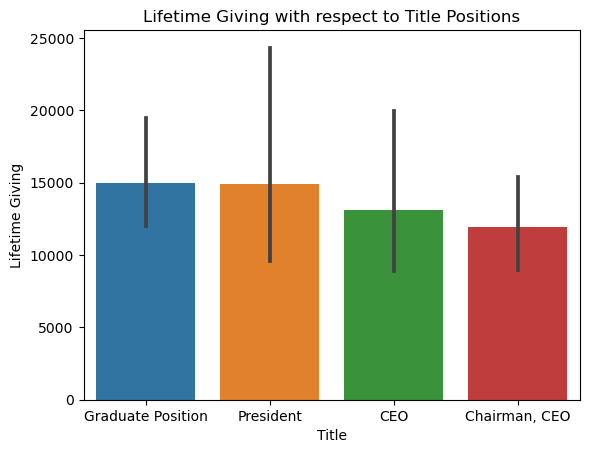

In [52]:
plt.title('Lifetime Giving with respect to Title Positions')
sns.barplot(data=df, x='Title', y='Lifetime Giving')

<AxesSubplot:title={'center':'Lifetime Giving with respect to Gender'}, xlabel='Gender', ylabel='Lifetime Giving'>

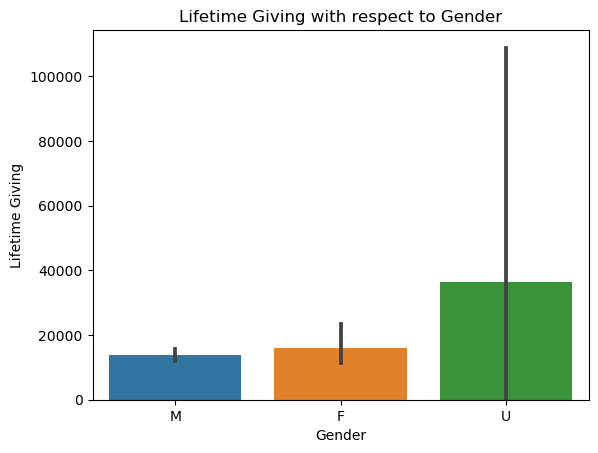

In [53]:
plt.title('Lifetime Giving with respect to Gender')
sns.barplot(data=df, x='Gender', y='Lifetime Giving')

<AxesSubplot:title={'center':'Lifetime Giving with respect to Province'}, xlabel='Province', ylabel='Lifetime Giving'>

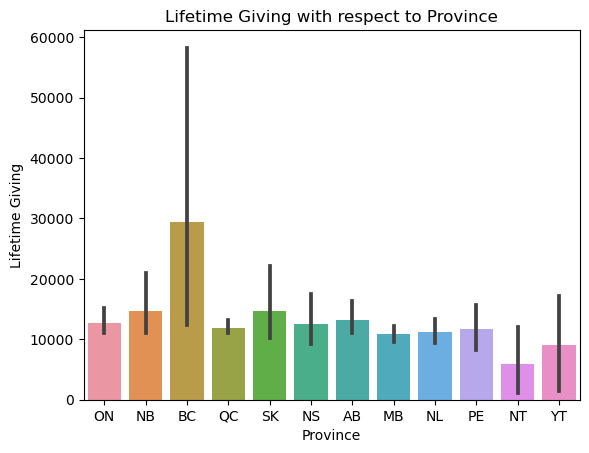

In [54]:
plt.title('Lifetime Giving with respect to Province')
sns.barplot(data=df, x='Province', y='Lifetime Giving')

In [55]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df['Faculty of Graduation'] = label_encoder.fit_transform(df['Faculty of Graduation'])

<AxesSubplot:title={'center':'Lifetime Giving with respect to Faculty'}, xlabel='Faculty of Graduation', ylabel='Lifetime Giving'>

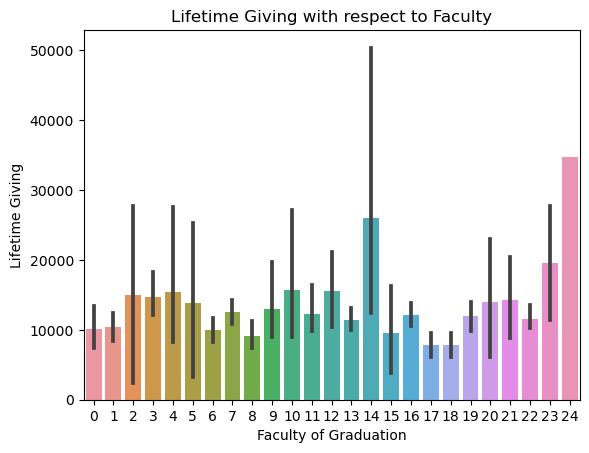

In [56]:
plt.title('Lifetime Giving with respect to Faculty')
sns.barplot(data=df, x='Faculty of Graduation', y='Lifetime Giving')

In [57]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df['Year of Graduation'] = label_encoder.fit_transform(df['Year of Graduation'])

<AxesSubplot:title={'center':'Lifetime Giving with respect to Year of Graduation'}, xlabel='Year of Graduation', ylabel='Lifetime Giving'>

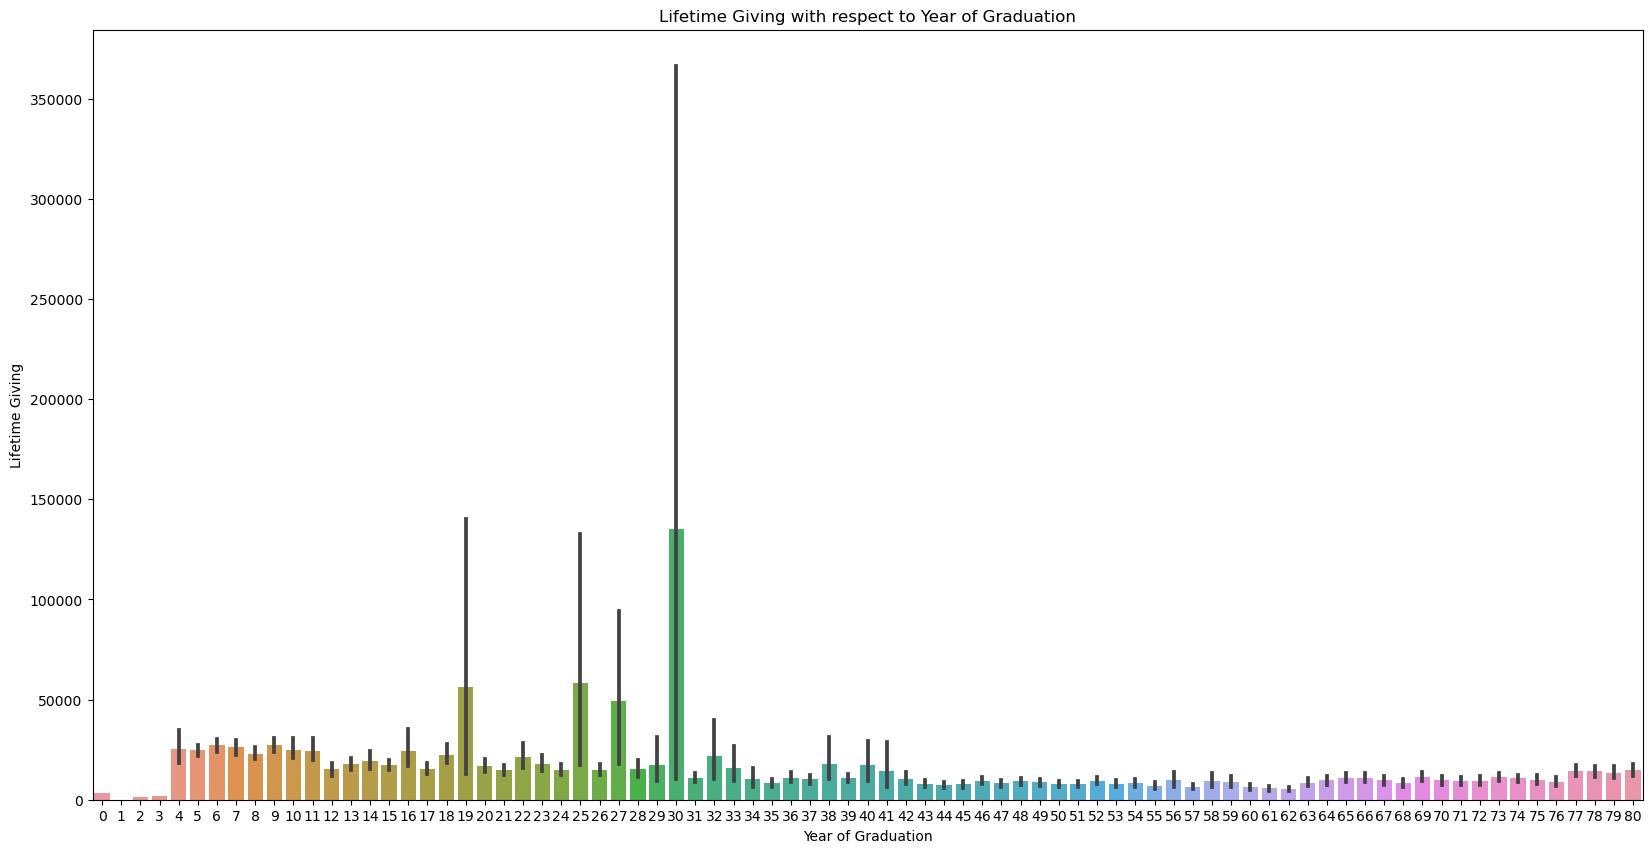

In [58]:
plt.figure(figsize=(20,10))
plt.title('Lifetime Giving with respect to Year of Graduation')
sns.barplot(data=df, x='Year of Graduation', y='Lifetime Giving')

<AxesSubplot:title={'center':'Events Attended in Lifetime with respect to Province'}, xlabel='Province', ylabel='Events Attended in Lifetime'>

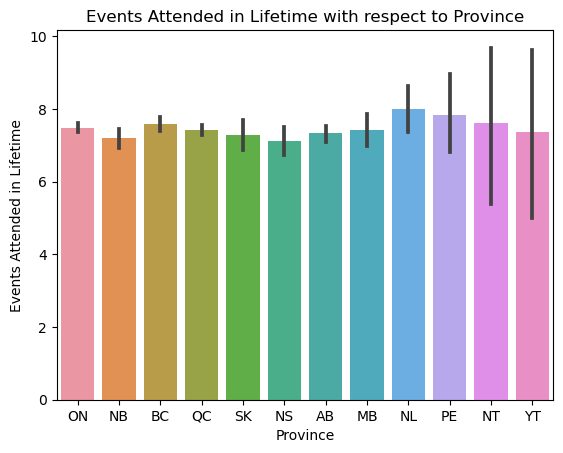

In [59]:
plt.title('Events Attended in Lifetime with respect to Province')
sns.barplot(data=df, x='Province', y='Events Attended in Lifetime')

<AxesSubplot:title={'center':'# of Instances of Volunteering with respect to Province'}, xlabel='Province', ylabel='# of Instances of Volunteering'>

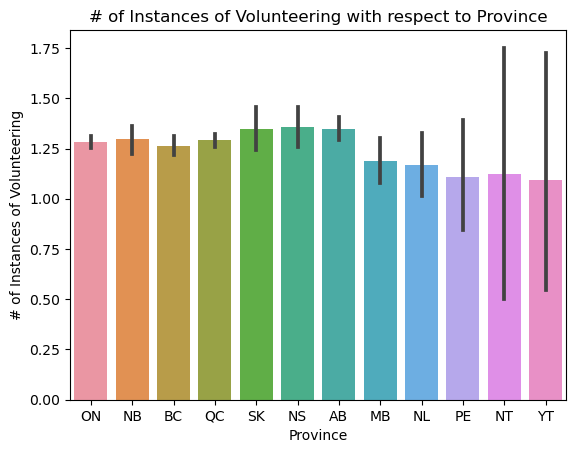

In [60]:
plt.title('# of Instances of Volunteering with respect to Province')
sns.barplot(data=df, x='Province', y='# of Instances of Volunteering')

<AxesSubplot:title={'center':'# of Clicks in the Past Month with respect to Province'}, xlabel='Province', ylabel='# of Clicks in the Past Month'>

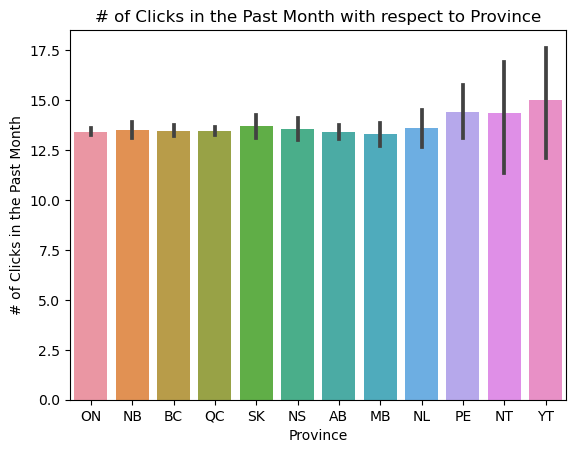

In [61]:
plt.title('# of Clicks in the Past Month with respect to Province')
sns.barplot(data=df, x='Province', y='# of Clicks in the Past Month')

### Adding extra column of 'Class of Donors' to predict the potential doners

In [62]:
df['Class of Donors'] = np.nan

In [63]:
for i in range(0,len(df)):
    if (df.loc[i][9] < 3000):
        df.at[i, 'Class of Donors'] = 0
    else:
        df.at[i, 'Class of Donors'] = 1
            

In [64]:
df[(df['Class of Donors'] == 1)]

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Class of Donors
0,0,100001,Graduate Position,E,M,Graduate,16,33,ON,73600,1997,1978,22080.0,0,N,0,27,1.0
1,1,100002,Graduate Position,E,M,Graduate,3,23,NB,8035,1962,1961,1768.0,14,N,1,19,1.0
2,2,100003,Graduate Position,E,F,Graduate,22,28,ON,9675,1961,1961,3483.0,15,N,1,18,1.0
3,3,100004,Graduate Position,UN,M,Graduate,9,25,BC,4070,1990,1986,2768.0,14,N,2,10,1.0
4,4,100005,Graduate Position,E,M,Graduate,14,20,QC,13377,1970,1957,3077.0,0,N,0,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,49983,149984,Graduate Position,E,M,Graduate,19,73,QC,49825,2006,2006,38864.0,6,Y,2,16,1.0
16035,49984,149985,Graduate Position,UN,F,Graduate,11,58,ON,12925,2009,2008,5299.0,6,N,0,17,1.0
16036,49994,149995,Graduate Position,E,M,Graduate,3,13,PE,4572,1968,1959,640.0,11,N,0,6,1.0
16037,49995,149996,Graduate Position,E,M,Graduate,11,25,ON,9174,1970,1969,5504.0,15,Y,1,1,1.0


In [65]:
df

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Class of Donors
0,0,100001,Graduate Position,E,M,Graduate,16,33,ON,73600,1997,1978,22080.0,0,N,0,27,1.0
1,1,100002,Graduate Position,E,M,Graduate,3,23,NB,8035,1962,1961,1768.0,14,N,1,19,1.0
2,2,100003,Graduate Position,E,F,Graduate,22,28,ON,9675,1961,1961,3483.0,15,N,1,18,1.0
3,3,100004,Graduate Position,UN,M,Graduate,9,25,BC,4070,1990,1986,2768.0,14,N,2,10,1.0
4,4,100005,Graduate Position,E,M,Graduate,14,20,QC,13377,1970,1957,3077.0,0,N,0,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,49983,149984,Graduate Position,E,M,Graduate,19,73,QC,49825,2006,2006,38864.0,6,Y,2,16,1.0
16035,49984,149985,Graduate Position,UN,F,Graduate,11,58,ON,12925,2009,2008,5299.0,6,N,0,17,1.0
16036,49994,149995,Graduate Position,E,M,Graduate,3,13,PE,4572,1968,1959,640.0,11,N,0,6,1.0
16037,49995,149996,Graduate Position,E,M,Graduate,11,25,ON,9174,1970,1969,5504.0,15,Y,1,1,1.0


In [66]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df['Province'] = label_encoder.fit_transform(df['Province'])

In [67]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [68]:
label_encoder = sklearn.preprocessing.LabelEncoder()
df['Preferred Language'] = label_encoder.fit_transform(df['Preferred Language'])

In [69]:
df['Class of Donors']=df['Class of Donors'].astype(float).astype(int)

In [70]:
df

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Class of Donors
0,0,100001,Graduate Position,0,1,Graduate,16,33,7,73600,1997,1978,22080.0,0,N,0,27,1
1,1,100002,Graduate Position,0,1,Graduate,3,23,3,8035,1962,1961,1768.0,14,N,1,19,1
2,2,100003,Graduate Position,0,0,Graduate,22,28,7,9675,1961,1961,3483.0,15,N,1,18,1
3,3,100004,Graduate Position,2,1,Graduate,9,25,1,4070,1990,1986,2768.0,14,N,2,10,1
4,4,100005,Graduate Position,0,1,Graduate,14,20,9,13377,1970,1957,3077.0,0,N,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16034,49983,149984,Graduate Position,0,1,Graduate,19,73,9,49825,2006,2006,38864.0,6,Y,2,16,1
16035,49984,149985,Graduate Position,2,0,Graduate,11,58,7,12925,2009,2008,5299.0,6,N,0,17,1
16036,49994,149995,Graduate Position,0,1,Graduate,3,13,8,4572,1968,1959,640.0,11,N,0,6,1
16037,49995,149996,Graduate Position,0,1,Graduate,11,25,7,9174,1970,1969,5504.0,15,Y,1,1,1


# Decision Tree Model

In [71]:
from sklearn import tree

In [72]:
from sklearn.model_selection import train_test_split
df_X = df[['Preferred Language','Gender','Faculty of Graduation','Province']]
df_Y = df["Class of Donors"]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2, train_size = 0.8)

In [73]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
print(DT.feature_importances_)
print(X_train.columns)

[0.22057556 0.08158155 0.32527147 0.37257142]
Index(['Preferred Language', 'Gender', 'Faculty of Graduation', 'Province'], dtype='object')


In [75]:
print('Tree depth: ', DT.get_depth())
print('Number of leaf nodes: ', DT.get_n_leaves())

Tree depth:  22
Number of leaf nodes:  801


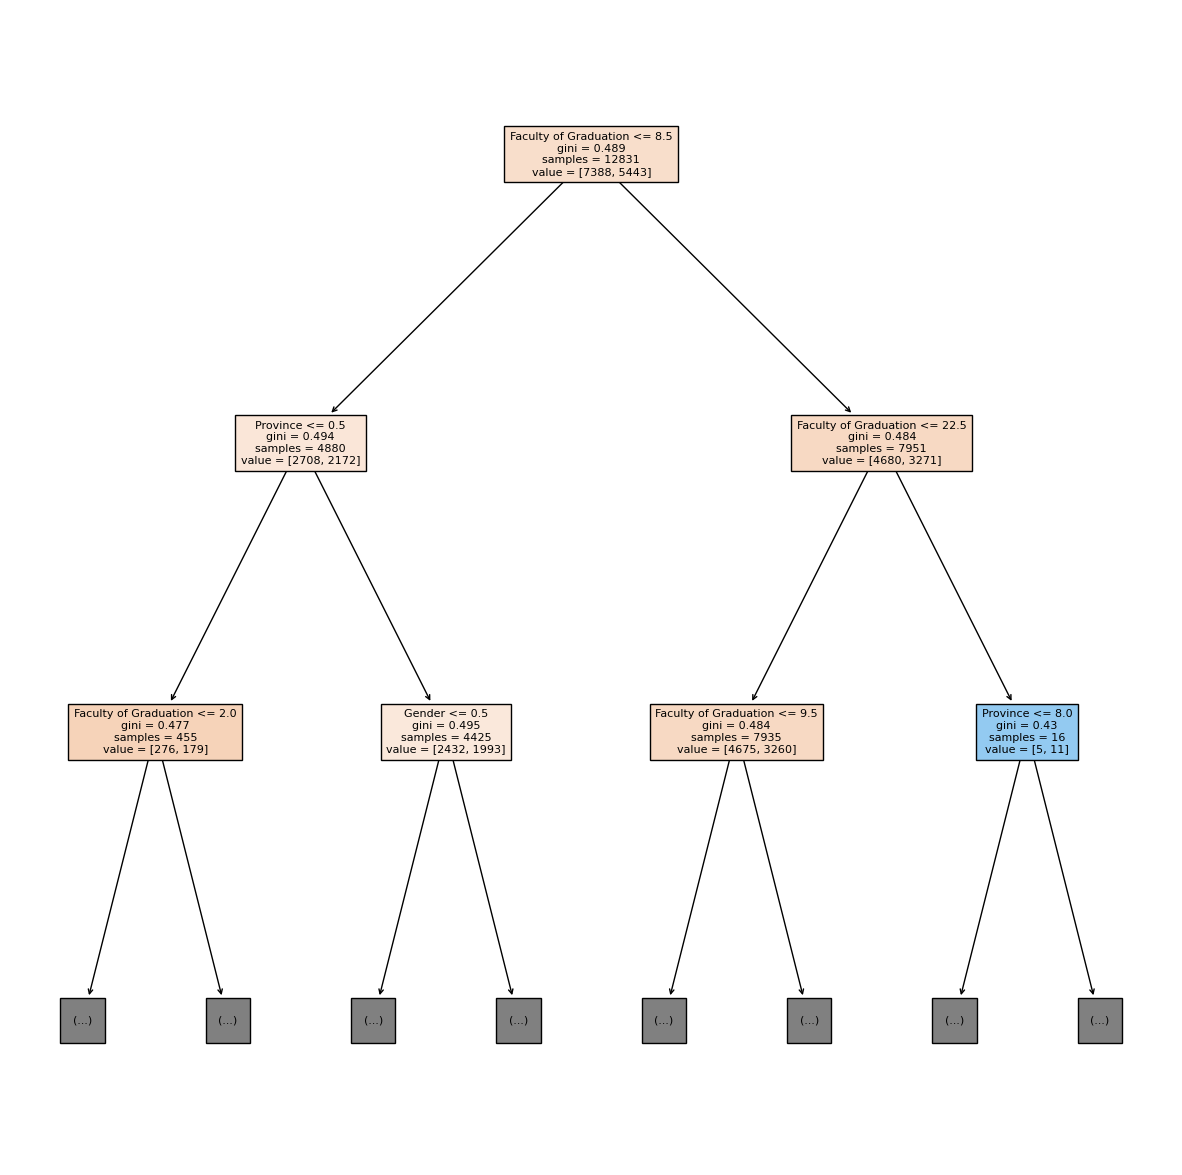

In [76]:
plt.figure(figsize=(15,15))
tree_plot = tree.plot_tree(DT, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 2)
plt.show()

In [77]:
print('training set accuracy: ', round(DT.score(X_train, y_train) * 100, 2))

training set accuracy:  60.95


In [78]:
DT_predictions = DT.predict(X_test)
print(DT_predictions)
print(y_test)

[0 0 0 ... 0 0 1]
6573     0
15619    1
2498     0
299      0
364      1
        ..
259      0
2150     0
12616    1
15987    1
388      0
Name: Class of Donors, Length: 3208, dtype: int32


In [79]:
y_test_DT = pd.DataFrame(y_test)

In [80]:
y_test_DT

,Class of Donors
6573,0
15619,1
2498,0
299,0
364,1
...,...
259,0
2150,0
12616,1
15987,1


In [81]:
print('test set accuracy: ', round(DT.score(X_test, y_test)*100, 2))

test set accuracy:  55.24


# Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
dfr_X = df[['Preferred Language','Gender','Faculty of Graduation','Province']]
dfr_Y = df["Class of Donors"]
X_train, X_test, y_train, y_test = train_test_split(dfr_X, dfr_Y, test_size = 0.2, train_size = 0.8)

In [84]:
RF = RandomForestClassifier(criterion = 'gini', n_estimators = 150)
RF.fit(X_train, y_train)
print('training set accuracy: ', round(RF.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(RF.score(X_test, y_test)*100, 2))

training set accuracy:  61.0
test set accuracy:  55.55


In [85]:
RF_predictions = RF.predict(X_test)
print(RF_predictions)
print(y_test)

[1 0 0 ... 0 0 0]
6373     0
3541     0
15673    1
8560     0
9255     0
        ..
14740    1
2745     0
7955     0
14584    1
15977    1
Name: Class of Donors, Length: 3208, dtype: int32


In [86]:
y_test_RF = pd.DataFrame(y_test)

In [87]:
y_test_RF

,Class of Donors
6373,0
3541,0
15673,1
8560,0
9255,0
...,...
14740,1
2745,0
7955,0
14584,1


In [88]:
print('test set accuracy: ', round(RF.score(X_test, y_test)*100, 2))

test set accuracy:  55.55
